# Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

### Library Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer



### Visualizing data distribution (1 Point)


In [ ]:
## Reading the data and removing columns that are not important. 
dataset = pd.read_csv("/movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [ ]:
 #######################################################   
 # print head of data frame with help of head function # 
 #######################################################
dataset.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


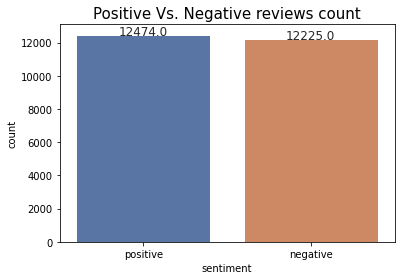

In [ ]:
 ####################################################### 
 # plot Positive Vs. Negative reviews count            # 
 #######################################################

sns.countplot(None)

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sentiment", data=dataset)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()



From the above bar graph we can observe that the number of positive and negative reviews are almost same. 

### Cleaning the Reviews (2 Points)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
 #############################################################################################  
 # Clean all the reviews in the dataset using the clean_text function provided above         # 
 ############################################################################################# 
 
for (index, row) in dataset.iterrows():
    row[0] = clean_text(row[0])


In [ ]:
 #####################################################################
 # print head of the "CLEANED" data frame with help of head function # 
 #####################################################################
 dataset.head()


,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,petter matteis love time money visually stunni...,positive
4,probably alltime favorite movie story selfless...,positive


### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [ ]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################

X_train, X_valid, y_train, y_valid = train_test_split(dataset['review'], 
                                                    dataset['sentiment'], test_size=0.20, random_state=42)

In [ ]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################
# initialise label encoder from sklearn module
L_encoder = LabelEncoder()
# fit on train labels and transform both train and validation labels
L_encoder.fit(y_train)
# train data
train_le= L_encoder.transform(y_train)
# validation data
validation_le = L_encoder.transform(y_valid)


In [ ]:
# convert the labels into one hot encoding form
# train data
train_encoded = pd.get_dummies(train_le, drop_first=True)
# test data
validation_encoded= pd.get_dummies(validation_le, drop_first=True)


### Pre-Processing The Text (5 Points)
 

In [ ]:
# You can use the modules given below
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################

# Tokenize our training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

word_index = tokenizer.word_index

vocabulary = list(word_index.keys())


#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################

train_seq = tokenizer.texts_to_sequences(X_train)
valid_seq = tokenizer.texts_to_sequences(X_valid)


#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_seq, maxlen=200)
valid_data = tf.keras.preprocessing.sequence.pad_sequences(valid_seq, maxlen=200)

print(f"Train data shape: {train_data.shape}")
print(f"Test  data shape: {valid_data.shape}")
# maxlen which is the maximum length of one review we will use for our training

print('Vocabulary : {}'.format(vocabulary))

Train data shape: (19759, 200)
Test  data shape: (4940, 200)
Vocabulary : ['br', 'movie', 'film', 'one', 'like', 'time', 'good', 'character', 'get', 'story', 'even', 'would', 'make', 'see', 'really', 'scene', 'well', 'much', 'people', 'great', 'also', 'bad', 'first', 'dont', 'show', 'way', 'thing', 'made', 'could', 'think', 'life', 'go', 'know', 'watch', 'many', 'love', 'never', 'two', 'seen', 'actor', 'plot', 'say', 'acting', 'little', 'best', 'look', 'year', 'end', 'ever', 'take', 'come', 'man', 'better', 'still', 'work', 'part', 'find', 'something', 'give', 'want', 'lot', 'im', 'director', 'back', 'real', 'watching', 'guy', 'performance', 'woman', 'doesnt', 'though', 'play', 'didnt', 'another', 'actually', 'nothing', 'funny', 'new', 'every', 'going', 'role', 'old', 'u', 'thats', 'point', 'cant', 'feel', 'day', 'quite', 'pretty', 'girl', 'cast', 'world', 'fact', 'young', 'seems', 'thought', 'minute', 'got', 'horror', 'comedy', 'however', 'big', 'enough', 'around', 'right', 'may', 'ac

### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [ ]:
glove_dictionary = {}
with open('/glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [ ]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

embedding_matrix = np.zeros((len(vocabulary)+1, 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
for word, i in word_index.items():
	embedding_vector = glove_dictionary.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
######################################################################



In [ ]:
embedding_matrix.shape

(99735, 200)

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Conv1D, Activation, Dense, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################

def build_model(embedding_matrix):

  ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
  '''
  
  model = Sequential()

  # TO DO: layer 1 : add embedding layer
  # The embedding layer maps the words to their embedding vectors from the embedding matrix

  embedding_layer = Embedding(len(vocabulary)+1, 200, input_length = 200,
                                weights = [embedding_matrix], trainable=False)
  model.add(embedding_layer)
  model.add(Dropout(0.3))

 # TO DO: layer 2 : add Bidirectional LSTM Layer

  model.add(Bidirectional(LSTM(64, return_sequences=True)))
  model.add(Dropout(0.4))

  # TO DO Add more layers : you can add more dense layers and dropout
  # NOTE : You should be able to achieve an validation accuracy greater than 85%
  #        within 10 epochs

  model.add(Bidirectional(LSTM(64)))
  model.add(Dropout(0.4))

  # TO DO Final layer : add output layer and activation 

  model.add(Dense(1, activation='sigmoid'))

  # TO DO : use a loss function, optimizer as adam to compile 
  # and evaluate model on auc,precision,recall,accuracy
  # HINT : choose your loss function based on the task (binary classification)

  model.compile('adam', 'binary_crossentropy', metrics=['AUC', 'Precision', 'Recall','accuracy'])
 
  return model

In [ ]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs

#################################################################
# Call the build_model function and initialize the model        #
#################################################################

bi_LSTM_model = build_model(embedding_matrix)
bi_LSTM_model.summary()
#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################

history = bi_LSTM_model.fit(train_data, train_encoded, batch_size=8, epochs = 10, 
                           validation_data=(valid_data, validation_encoded))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 200, 200)          19947000  
                                                                 
 dropout_31 (Dropout)        (None, 200, 200)          0         
                                                                 
 bidirectional_21 (Bidirecti  (None, 200, 128)         135680    
 onal)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 200, 128)          0         
                                                                 
 bidirectional_22 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 128)             

### Plotting Accuracy and Losses (5 Points)
 




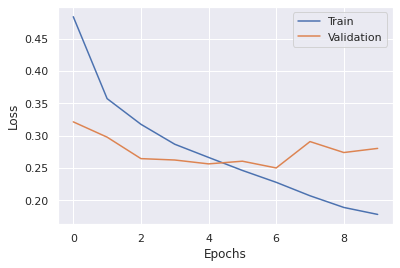

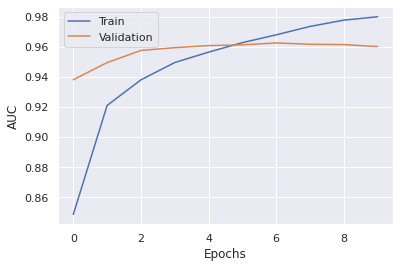

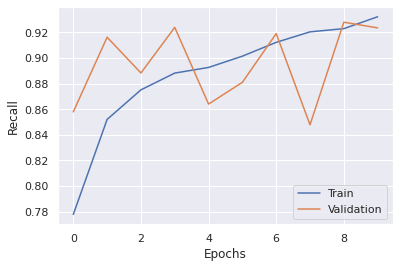

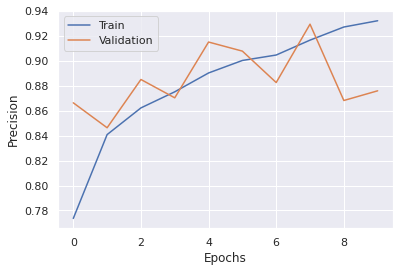

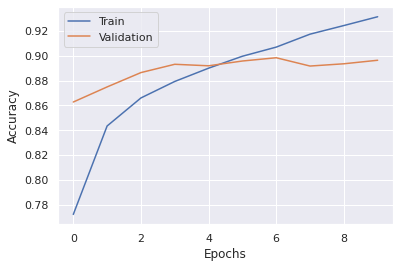

In [ ]:
####################################
# PLOT :                           #
# train loss vs val loss           #

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# train auc vs val auc             #

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.show()

# train recall vs val recall       #

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

# train precision vs val precision #

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.show()

# train accuracy vs val accuracy   #

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

####################################


The train and validation accuracy after 10 epochs is 93% and 89%

In [ ]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

import pickle 


pickle.dump(bi_LSTM_model, open('bidirectional_LSTM_model.pkl', 'wb'))

### Prediction (5 Points)

In [ ]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################
import pickle 
saved_model = pickle.load(open('/bidirectional_LSTM_model.pkl', 'rb'))

In [ ]:
# use the saved model to predict the reviews
def predict_review(review):
  '''
  Arguments:
    review : A single review for which you want to predict the sentiment for.
             example: "This movie was amazing! I would defenitely watch it again."

  Returns:
    The predicted sentiment for the review : either 1 or 0
  '''
  cleaned_review = clean_text(review)
  review_seq = tokenizer.texts_to_sequences([cleaned_review])

  review_data = tf.keras.preprocessing.sequence.pad_sequences(review_seq, maxlen=200)


  preds = saved_model.predict(review_data)

  if preds[0] > 0.5:
    pred = 1
  else: 
    pred = 0

  return pred

 ############################################################################# 
 # Predict the sentiment for the given review using the model                #
 # that you trained and return the sentiment                                 #
 #                                                                           #
 # HINT : Remember that the review needs to be "preprocessed" before you use #
 # it for prediction                                                         #
 #############################################################################




In [ ]:
# Do not edit this cell
for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0


### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0